In [1]:
import pandas as pd
from math import sqrt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_science_quantitative.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

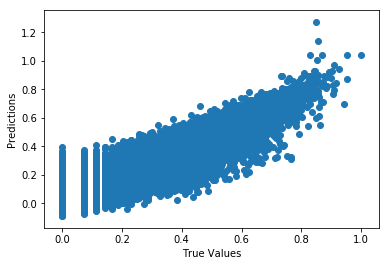

[ 0.63151465  0.00363192  0.03664448  0.01192198  0.00539043  0.07882606
  0.21331425 -0.18904936  0.06641934 -0.0243033  -0.09041952 -0.04862734
  0.01694047 -0.0457619  -0.06422144  0.0227424  -0.11047255  0.13556272
  0.21012694 -0.12422299 -0.04737756  0.099523   -0.61987847 -0.20238507
 -0.13123162 -0.17585124  0.14609379 -0.03052983 -0.18900415  0.55335175
 -0.06321487  0.03804857  1.23094255 -0.22788374  0.11959149 -0.10640956
  0.03502048 -0.01893846 -0.01089133]


In [5]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print(lm.coef_)

In [6]:
scores = cross_val_score(model, df, y, cv=4)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.78460898  0.7801021   0.78162625  0.78919265]


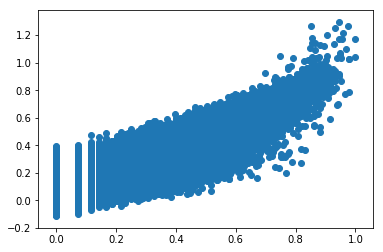

In [7]:
predictions = cross_val_predict(model, df, y, cv=4)
plt.scatter(y, predictions)
plt.show()

In [8]:
print(y.shape)
print(predictions.shape)
accuracy = metrics.r2_score(y, predictions)
print("R2Score:", accuracy)
rmse = sqrt(metrics.mean_squared_error(y,  predictions))
print("RMSE:", rmse)

(99178,)
(99178,)
R2Score: 0.784134612582
RMSE: 0.09299797356587272


In [9]:
print(lm.coef_)

[ 0.63151465  0.00363192  0.03664448  0.01192198  0.00539043  0.07882606
  0.21331425 -0.18904936  0.06641934 -0.0243033  -0.09041952 -0.04862734
  0.01694047 -0.0457619  -0.06422144  0.0227424  -0.11047255  0.13556272
  0.21012694 -0.12422299 -0.04737756  0.099523   -0.61987847 -0.20238507
 -0.13123162 -0.17585124  0.14609379 -0.03052983 -0.18900415  0.55335175
 -0.06321487  0.03804857  1.23094255 -0.22788374  0.11959149 -0.10640956
  0.03502048 -0.01893846 -0.01089133]
